In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:\corona\heart_Disease\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
X = data.drop('target',axis=1)
y = data['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [14]:
models = []
models.append(('LogisticRegression',LogisticRegression()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('SVC',SVC()))
models.append(('XGBClassifier',XGBClassifier(eta=0.01,gamma=25)))

In [15]:
import time

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    pred = [round(val) for val in y_pred]
    
    
    accuracy = accuracy_score(y_test,pred)
    print("Accuracy: %.2f%%"%(accuracy*100),name)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 83.61% LogisticRegression
Accuracy: 80.33% RandomForestClassifier
Accuracy: 63.93% SVC
Accuracy: 83.61% XGBClassifier


<br>
___________________________________________________________________________________________________________________________

# HYPER-PERAMETER TUNNING IN XGBOOST

In [16]:
df = pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.shape

(10000, 14)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

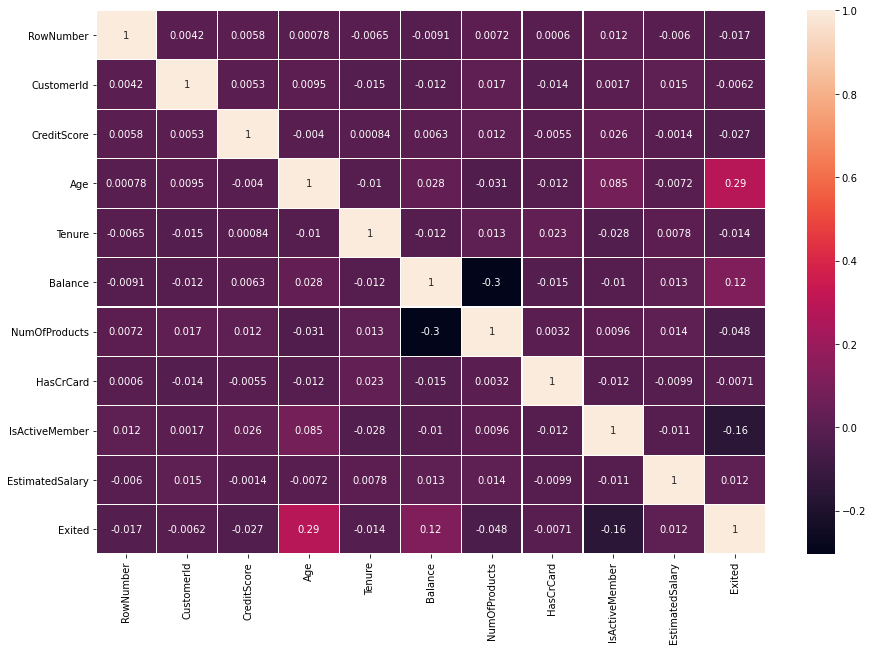

In [28]:
cor = df.corr()
top_corr_feature = cor.index
plt.figure(figsize=(15,10))

g = sns.heatmap(df[top_corr_feature].corr(),annot=True,linewidths=0.2)

In [29]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [30]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [32]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [33]:
X.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58


In [34]:
X = pd.concat([X,gender,geography],axis=1)
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [35]:
X.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [36]:
X.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1


In [38]:
params = {
    
    "learning_rate"    : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"        : [3,4,5,6,7,8,9,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]

}

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [40]:
classifier = XGBClassifier()

random_search = RandomizedSearchCV(classifier, 
                                   param_distributions=params, 
                                   n_iter=5, 
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=3)

In [43]:
import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    else:
        thour, temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin, tsec = divmod(temp_sec,60)
        print(f"Time Taken: {thour}hr, {tmin}mins, {round(tsec,2)}sec")

In [44]:
from datetime import datetime

start_time = timer(None)
random_search.fit(X,y)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.2s finished


Time Taken: 0.0hr, 0.0mins, 10.74sec


In [45]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [46]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.3,
 'colsample_bytree': 0.4}

In [48]:
classifier = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [49]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=10)

In [50]:
score

array([0.872, 0.864, 0.876, 0.871, 0.863, 0.853, 0.869, 0.874, 0.86 ,
       0.858])

In [51]:
score.mean()

0.866